# Desafio Cientista de Dados - PProductions 🎬
Este notebook contém a análise exploratória e modelagem dos dados de filmes, com o objetivo de:

- Entender os principais fatores que influenciam o sucesso de um filme.
- Responder perguntas de negócio levantadas no desafio.
- Desenvolver um modelo simples para prever a nota do IMDB.
- Salvar o modelo em formato `.pkl`.

---

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")
sns.set_style("whitegrid")


# Explicação das Bibliotecas e Configurações Visuais
## Bibliotecas

- **pandas** → usado para **manipulação e análise de dados** (tabelas, séries temporais etc.).  
- **numpy** → usado para **cálculos numéricos** e **matrizes**.  
- **matplotlib** → usado para **visualização de dados** (gráficos).  
- **seaborn** → biblioteca de **gráficos mais estilizados**, construída sobre o matplotlib.  
---
## Configurações Visuais

- `plt.style.use("seaborn-v0_8")` → define o **estilo visual** dos gráficos para o estilo *Seaborn* (versão 0.8), deixando-os mais modernos e limpos.  
- `sns.set_palette("pastel")` → aplica a **paleta de cores pastel**, deixando os gráficos com cores mais suaves e agradáveis.  


In [3]:
#Carregar o dataset
dados_imdb = pd.read_csv("desafio_indicium_imdb.csv", sep=",")

In [52]:
#Limpeza
# O jeito seguro de remover a coluna (evita o erro)
if 'Unnamed: 0' in dados_imdb.columns:
    dados_imdb = dados_imdb.drop('Unnamed: 0', axis=1)
    print("Coluna 'Unnamed: 0' removida com sucesso! ✅")
else:
    print("Coluna 'Unnamed: 0' não encontrada. Talvez já tenha sido removida. 😉")

Coluna 'Unnamed: 0' não encontrada. Talvez já tenha sido removida. 😉


Visão Geral do Dataset e Pré-processamento Inicial:
O dataset original contém 999 entradas e 16 colunas, abrangendo informações como título, ano de lançamento, classificação etária, duração, gênero, nota IMDB, sinopse (Overview), Meta_score, diretor, elenco principal, número de votos e faturamento (Gross).

In [53]:
# Visão geral inicial
print("Dimensões:", dados_imdb.shape)
dados_imdb.head()

Dimensões: (999, 15)


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [54]:
#Info e estatísticas descritivas:

dados_imdb.info()

#df.describe(include="all") → estatísticas de todas as colunas.
#.T → deixa a saída mais legível, pois cada coluna do seu DataFrame fica em uma linha.
dados_imdb.describe(include ='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.2+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Series_Title,999,998,Drishyam,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Released_Year,998.0,NaN,NaN,NaN,1991.214429,23.308539,1920.0,1976.0,1999.0,2009.0,2020.0
Certificate,898,16,U,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,999.0,NaN,NaN,NaN,122.871872,28.101227,45.0,103.0,119.0,137.0,321.0
Genre,999,202,Drama,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMDB_Rating,999.0,NaN,NaN,NaN,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Overview,999,999,An organized crime dynasty's aging patriarch t...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meta_score,999.0,NaN,NaN,NaN,78.131131,11.373766,28.0,72.0,79.0,85.5,100.0
Director,999,548,Alfred Hitchcock,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star1,999,659,Tom Hanks,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conversão de Tipos de Dados:
Das colunas Gross (faturamento), Runtime (duração)  e Released_Year foram convertidas para tipos numéricos

In [55]:
#Tratamento inicial de colunas:

# Converter Gross(renda bruta) para número:

dados_imdb["Gross"] = dados_imdb["Gross"].astype(str).str.replace(",", "").str.replace("$", "").str.strip()

dados_imdb["Gross"] = pd.to_numeric(dados_imdb["Gross"], errors="coerce")

dados_imdb["Gross"].fillna(dados_imdb["Gross"].median(), inplace=True)

C:\Users\lampe\AppData\Local\Temp\ipykernel_22420\1466095800.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_imdb["Gross"].fillna(dados_imdb["Gross"].median(), inplace=True)


In [73]:
# Converter 'Runtime' (tempo de filme) para numérico (minutos):

# O jeito seguro de converter a coluna (à prova de erros)

# Primeiro, verificamos se a coluna é do tipo 'object' (que geralmente armazena texto)
if pd.api.types.is_object_dtype(dados_imdb['Runtime']):
    dados_imdb['Runtime'] = dados_imdb['Runtime'].str.replace(' min', '', regex=False).astype(int)
    print("Coluna 'Runtime' convertida para número com sucesso! ✅")
else:
    print("Coluna 'Runtime' já é numérica. Nenhuma conversão necessária. 😉")

Coluna 'Runtime' já é numérica. Nenhuma conversão necessária. 😉


In [57]:
# Converter 'Released_Year' para numérico, tratando erros

dados_imdb['Released_Year'] = pd.to_numeric(dados_imdb['Released_Year'],errors = 'coerce')

In [58]:
# Contagem de valores nulos
dados_imdb.isna().sum()

Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

A coluna Meta_score (média ponderada de críticas) possuía valores ausentes, que foram preenchidos com a mediana da coluna. 

In [59]:
# Preencher valores ausentes em 'Meta_score' com a mediana
dados_imdb['Meta_score'].fillna(dados_imdb['Meta_score'].median(), inplace = True)

C:\Users\lampe\AppData\Local\Temp\ipykernel_22420\2598326600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_imdb['Meta_score'].fillna(dados_imdb['Meta_score'].median(), inplace = True)


A maioria dos filmes neste dataset possui notas IMDB concentradas entre 7.7 e 8.5. Isso sugere que a base de dados é composta predominantemente por filmes de alta qualidade e bem avaliados pelo público e pela crítica.

In [60]:
frequencia_imdb = dados_imdb['IMDB_Rating'].value_counts()
frequencia_imdb

IMDB_Rating
7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.8      5
8.7      5
9.0      3
8.9      3
9.2      1
Name: count, dtype: int64

In [61]:
# 1. Distribuição da Nota IMDB

plt.figure(figsize=(10, 6))
sns.histplot(dados_imdb["IMDB_Rating"], bins=20, kde=True)
plt.title("Distribuição da Nota IMDB")
plt.xlabel("Nota IMDB")
plt.ylabel("Frequência")
plt.savefig("distribuicao_imdb_rating.png")
plt.close()

In [62]:
frequencia_gross = dados_imdb['Gross'].value_counts()
frequencia_gross

Gross
23457439.5     169
4360000.0        5
5321508.0        2
5450000.0        2
9600000.0        2
              ... 
696690.0         1
1378435.0        1
141843612.0      1
13780024.0       1
43182776.0       1
Name: count, Length: 823, dtype: int64

Isso indica que o sucesso financeiro é um fenômeno concentrado, onde poucos filmes arrecadam a maior parte da receita. A média de faturamento pode ser enganosa devido a esses outliers de alto valor.

In [63]:
# 2. Distribuição do Faturamento (Gross)

plt.figure(figsize=(10, 6))
sns.histplot(dados_imdb["Gross"].dropna(), bins=30, kde=True)
plt.title("Distribuição do Faturamento (Gross)")
plt.xlabel("Faturamento (em centenas de milhões)")
plt.ylabel("Frequência")
plt.savefig("distribuicao_faturamento.png")
plt.close()

In [64]:
frequencia_n_votos = dados_imdb['No_of_Votes'].value_counts()
frequencia_n_votos

No_of_Votes
65341      2
171640     1
699256     1
32802      1
93878      1
          ..
166544     1
34075      1
43374      1
26471      1
1826188    1
Name: count, Length: 998, dtype: int64

Podemos observar que a popularidade é rara e concentrada: A frequência de itens com poucos votos é altíssima (a maioria dos seus itens não é popular), enquanto a frequência de itens com muitos votos é baixíssima (os "superestrelas" são muito raros).

In [65]:
# 3. Distribuição do Número de Votos

plt.figure(figsize=(10, 6))
sns.histplot(dados_imdb["No_of_Votes"].dropna(), bins=30, kde=True)
plt.title("Distribuição do Número de Votos")
plt.xlabel("Número de Votos")
plt.ylabel("Frequência")
plt.savefig("distribuicao_votos.png", dpi=300, bbox_inches='tight')
plt.close()


In [66]:
frequencia_votos = dados_imdb['No_of_Votes'].value_counts()
frequencia_votos

No_of_Votes
65341      2
171640     1
699256     1
32802      1
93878      1
          ..
166544     1
34075      1
43374      1
26471      1
1826188    1
Name: count, Length: 998, dtype: int64

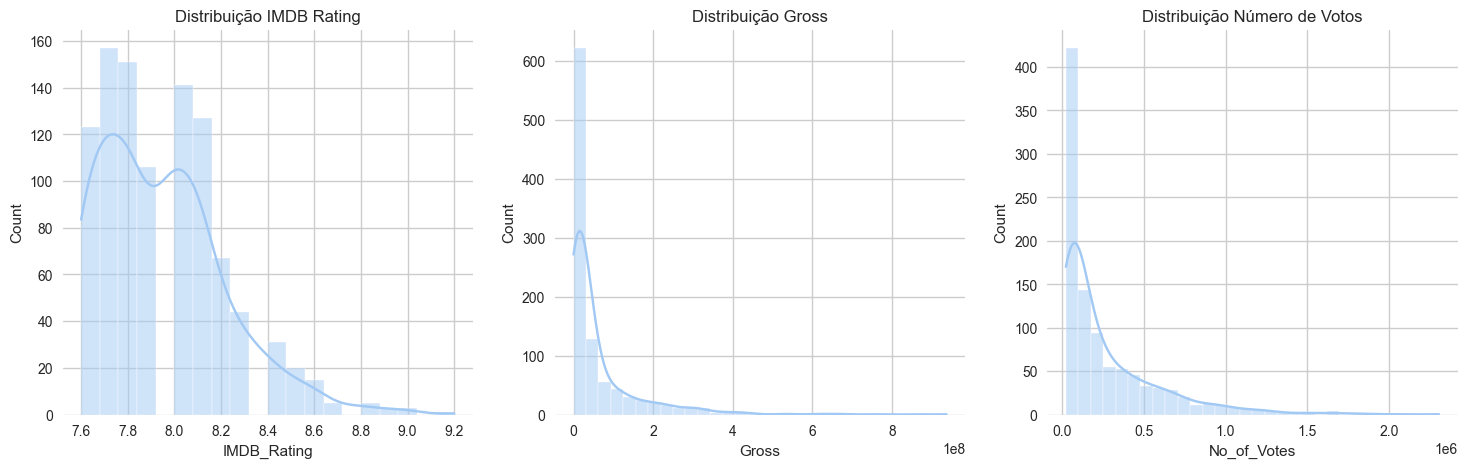

In [67]:
# Distribuições básicas juntas

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(dados_imdb["IMDB_Rating"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribuição IMDB Rating")

sns.histplot(dados_imdb["Gross"].dropna(), bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribuição Gross")

sns.histplot(dados_imdb["No_of_Votes"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribuição Número de Votos")

plt.savefig("distribuicoes_juntas.png", dpi=300, bbox_inches='tight')


plt.show()
plt.close()

# Filmes Considerados Melhores(Nota IMDB) Realmente Faturam Mais?


In [68]:
# Relação entre Nota IMDB e Faturamento

plt.figure(figsize=(10, 6))
sns.scatterplot(x="IMDB_Rating", y="Gross", data=dados_imdb)
plt.title("Relação entre Nota IMDB e Faturamento")
plt.xlabel("Nota IMDB")
plt.ylabel("Faturamento")
plt.savefig("relacao_imdb_faturamento.png")
plt.close()


Este gráfico mostra que, no grupo de filmes de elite (nota > 7,5), a qualidade percebida (nota) não garante o sucesso de bilheteria. O faturamento parece ser muito mais influenciado por outros fatores, como gênero, apelo popular, campanha de marketing e elenco, do que por uma pequena diferença na avaliação crítica.


In [69]:
#Top 10 Gêneros mais comuns
generos = dados_imdb["Genre"].str.split(", ", expand=True).stack()

# Contar quantas vezes cada gênero aparece
contagem_generos = generos.value_counts()

# Imprimir os 10 mais comuns
print(contagem_generos.head(10))

# Criar gráfico (mesmo que você já tinha)
plt.figure(figsize=(12, 8))
sns.countplot(y=generos, order=contagem_generos.index[:10], palette="viridis")
plt.title("Top 10 Gêneros Mais Comuns")
plt.xlabel("Contagem")
plt.ylabel("Gênero")
plt.savefig("top_10_generos.png")
plt.close()

Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64


C:\Users\lampe\AppData\Local\Temp\ipykernel_22420\3238223783.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=generos, order=contagem_generos.index[:10], palette="viridis")


# Top 10 Gêneros Mais Comuns

O gênero Drama é o mais prevalente no dataset. Outros gêneros comuns incluem Comédia, Crime e Aventura.


In [70]:
# Separar os gêneros e contar
generos = dados_imdb["Genre"].str.split(", ", expand=True).stack()
top10_generos = generos.value_counts().head(10)
top10_generos

Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64

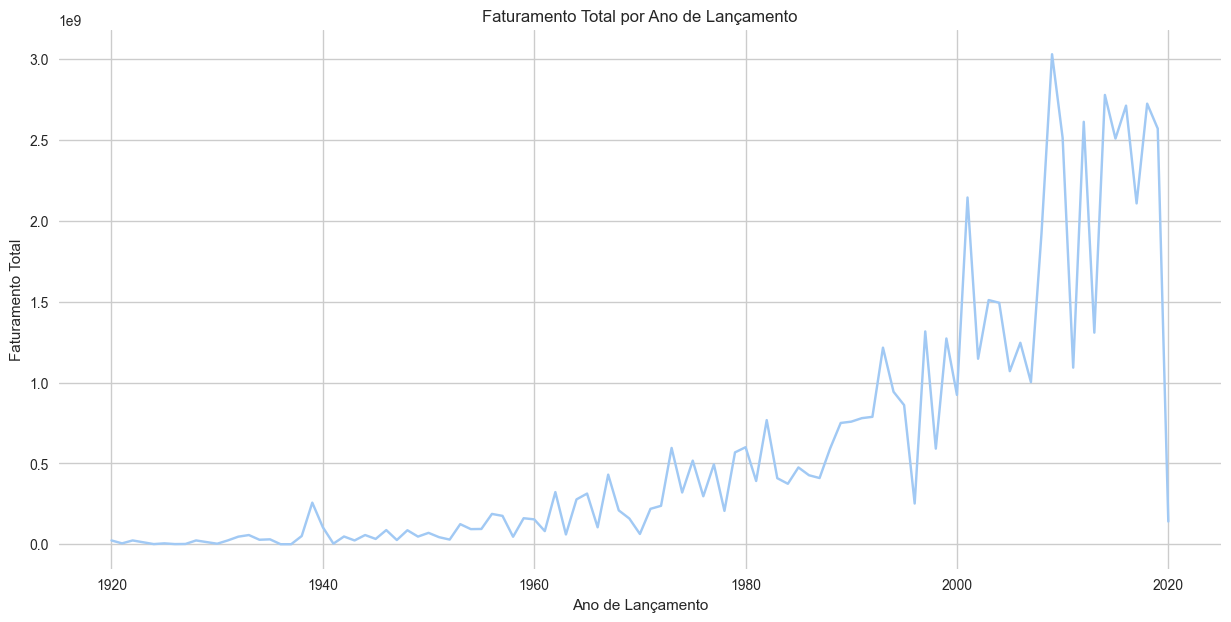

In [71]:
# Faturamento por Ano de Lançamento
plt.figure(figsize=(15, 7))
faturamento_por_ano = dados_imdb.groupby("Released_Year")["Gross"].sum().reset_index()
sns.lineplot(x="Released_Year", y="Gross", data=faturamento_por_ano)
plt.title("Faturamento Total por Ano de Lançamento")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Faturamento Total")
plt.savefig("faturamento_por_ano.png")
plt.show()
plt.close()

# Evolução da Indústria do Cinema

O gráfico ilustra a **jornada da indústria cinematográfica** ao longo do último século. Um crescimento exponencial transformou o setor em um **mercado bilionário**.  

Nas últimas décadas, esse sucesso tornou-se mais **volátil**, dependendo cada vez mais de **poucos mega-blockbusters** lançados a cada ano.  

Além disso, a **linha do tempo evidencia o impacto da pandemia de COVID-19**, que provocou uma **queda abrupta em 2020**, interrompendo décadas de crescimento contínuo.


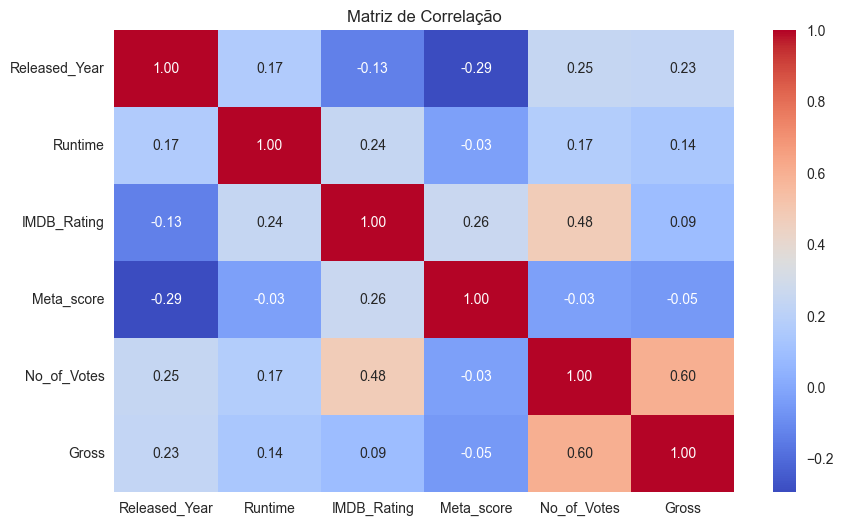

In [72]:
plt.figure(figsize=(10,6))
corr = dados_imdb.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


In [ ]:
dados_imdb.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,NaN,NaN,NaN,500.0,288.530761,1.0,250.5,500.0,749.5,999.0
Series_Title,999,998,Drishyam,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Released_Year,998.0,NaN,NaN,NaN,1991.214429,23.308539,1920.0,1976.0,1999.0,2009.0,2020.0
Certificate,898,16,U,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,999.0,NaN,NaN,NaN,122.871872,28.101227,45.0,103.0,119.0,137.0,321.0
Genre,999,202,Drama,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMDB_Rating,999.0,NaN,NaN,NaN,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Overview,999,999,An organized crime dynasty's aging patriarch t...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meta_score,999.0,NaN,NaN,NaN,78.131131,11.373766,28.0,72.0,79.0,85.5,100.0
Director,999,548,Alfred Hitchcock,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
